# AI-Generated Exploration Notebook for Dandiset 001276

**This notebook was automatically generated with dandi-notebook-gen. It has not been fully reviewed and may contain errors or incomplete information. Please interpret all analyses with caution.**

---

## Overview

**Name:** NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers

**Description:** 

Experiments were conducted using a four-electrode array with an inter-electrode distance of 10.0 mm. The study focused on optimizing the CANCAN protocol and investigating the effect of varying burst numbers on permeabilization distribution across confluent cell monolayers. Canceling pulses aimed to minimize cell damage near the electrodes while targeting central cells. Data includes Hoechst and YoPro-1 fluorescence.

**Contributors:** Giedre Silkuniene, Mantas Silkunas, Pakhomov, Andrei, National Institutes of Health

**License:** CC-BY-4.0

[Full citation and more info](https://dandiarchive.org/dandiset/001276/draft)

---

This guide demonstrates how to explore NWB data in this Dandiset, visualize example data, and extract relevant metadata.

## Imports and Setup

This notebook requires `dandi`, `pynwb`, `remfile`, `h5py`, `numpy`, `matplotlib`, and `seaborn`.

Make sure these packages are installed. You can install missing packages by running in your environment:

```
pip install dandi pynwb remfile h5py numpy matplotlib seaborn
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

sns.set_theme()

## List Assets in the Dandiset

Using the DANDI API client, list assets in this Dandiset. Below we fetch the first 5 assets.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset('001276', 'draft')
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets. Showing first 5 filenames and sizes:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size/1e6:.1f} MB)")

Found 108 assets. Showing first 5 filenames and sizes:
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb (373.4 MB)
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb (415.3 MB)
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb (471.1 MB)
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb (473.9 MB)
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb (473.8 MB)


## Accessing an Example NWB File Remotely

We'll demonstrate loading a remote NWB file into Python using `remfile` + `h5py` + `pynwb`. For this example, we choose:

**File:** `sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb`

**Size:** ~471 MB

**Note:** Access is streamed over the network, and loading large datasets may take some time.

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/95141d7a-82aa-4552-940a-1438a430a0d7/download/"

file = remfile.File(nwb_url)
f = h5py.File(file, mode='r')
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print("Loaded NWB file with session_id:", nwbfile.session_id)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file with session_id: single_time_point


## Exploring Metadata

Below we extract some key metadata fields from the NWBFile:

In [4]:
print("Session description:", nwbfile.session_description)
print("Identifier:", nwbfile.identifier)
print("Session start time:", nwbfile.session_start_time)
print("Subject ID:", nwbfile.subject.subject_id)
print("Subject species:", nwbfile.subject.species)
print("Subject strain:", nwbfile.subject.strain)

Session description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless steel setup with an inter-electrode distance of 10.0 mm. The CanCan exposure protocol involved delivering packets of 600 ns pulses from four electrodes. Initially, a single 600 ns pulse (7.2 kV) was applied from one electrode (e.g., electrode 1), constituting phase 1. Subsequently, simultaneous 600 ns pulses with an amplitude reduced by 12.5% were delivered from two electrodes (e.g., electrodes 2 and 4), followed by another set of simultaneous pulses with an additional 12.5% am

## Exploring the Imaging Data

This NWB file contains a single `ImageSeries` named `SingleTimePointImaging`. The dataset is large with shape (1, 19190, 19190).

*We will load only the first 1024x1024 pixel region of the image for visualization.*

Subregion shape: (1024, 1024)


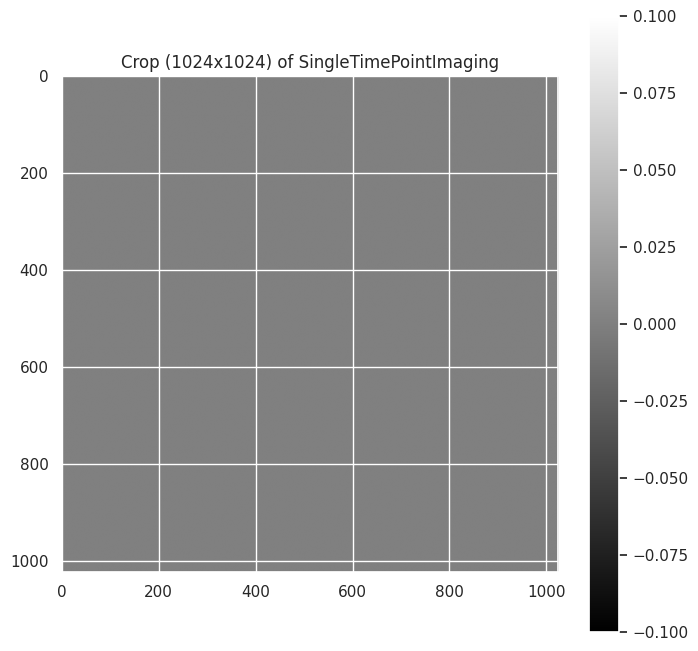

In [5]:
img_series = nwbfile.acquisition['SingleTimePointImaging']
# Load a small crop of the first plane
crop_size = 1024
image_data = img_series.data[0, :crop_size, :crop_size]

print("Subregion shape:", image_data.shape)

plt.figure(figsize=(8,8))
plt.imshow(image_data, cmap='gray')
plt.title('Crop (1024x1024) of SingleTimePointImaging')
plt.colorbar()
plt.show()

## Image Pixel Value Distribution

The histogram below shows the distribution of pixel intensities in the crop.

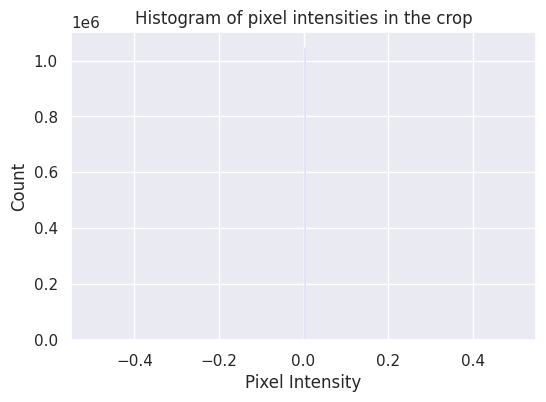

In [6]:
plt.figure(figsize=(6,4))
plt.hist(image_data.flatten(), bins=256, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Histogram of pixel intensities in the crop')
plt.show()

## Summary

This notebook demonstrated:
- Accessing Dandiset metadata and listing assets programmatically
- Streaming remote NWB files via `remfile`
- Extracting metadata from the NWB file
- Visualizing a subset of large microscopy imaging data

For further analysis, users should:
- Explore additional assets
- Load other image channels or modalities present
- Consider downloading files locally for more computationally intensive analyses